# 模块分析：在梯度1&2上，统计yeo模块的前后差异

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_ind

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
df = pd.read_csv(r"E:\006_ET_MRgFUS\12_gradient_batch2.1\07_second_gradient_aligned_mean_ROI\统计.csv")
#df = pd.read_csv(r"E:\006_ET_MRgFUS\09_gradient_batch2\04_second_gradient_aligned_mean\second_gradient_整合.csv")

for i in range(1, 8):
    sub_df = df.loc[df['Subnetwork'] == i]

    values1 = sub_df['NCNCNC'].values
    values2 = sub_df['ET000d'].values
    values3 = sub_df['ET180d'].values

    ts, ps = ttest_ind(values1, values2)
    print(i, ps)

print("===================")

for i in range(1, 8):
    sub_df = df.loc[df['Subnetwork'] == i]

    values1 = sub_df['NCNCNC'].values
    values2 = sub_df['ET000d'].values
    values3 = sub_df['ET180d'].values

    ts, ps = ttest_rel(values2, values3)
    print(i, ps)

1 9.770924289364837e-05
2 0.1347621070943037
3 0.0030698052096581304
4 0.16655562499759788
5 0.040363280264528886
6 0.0033998555262653757
7 0.9590124607529042
1 3.990890491448741e-12
2 7.233711878108e-05
3 2.2067852317157434e-06
4 6.1254878542757705e-06
5 3.784930138323475e-09
6 1.0854381219548561e-11
7 0.7002630649511832


In [2]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_ind
from mytoolkit1.ttest import ind_cohen_d, rel_cohen_d
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from datasets import subject_ET_FUS
"""
import importlib
importlib.reload(ind_cohen_d)
"""

subjects = subject_ET_FUS.load_subjects(r"E:\006_ET_MRgFUS\02_data_management\data_management_add_NC2.csv")

subnetwork_path = r'E:\006_ET_MRgFUS\09_gradient_batch2\02_nii_mask\7network_atlas1039.csv'
subnetwork_df = pd.read_csv(subnetwork_path)
subnetwork_labels = subnetwork_df['Subnetwork'].values

def read_subject_gradients(df_path, subnetwork_labels,
                            subnetwork_i, ):
    df1 = pd.read_csv(df_path, index_col=0)
    x = df1['gradient'].values
    x = x[subnetwork_labels==subnetwork_i]
    return x

for i in range(1,8): 
    mean_values1 = []
    mean_values2 = []
    mean_values3 = []
    for subject in subjects:
        path1 = subject.get_observation('base').gradient.build_path('batch2.1/aligned_gradient2.csv')
        values1 = read_subject_gradients(path1, subnetwork_labels, i,)
        mean_value1 = np.mean(values1)
        mean_values1.append(mean_value1)

        path2 = subject.get_observation('180d').gradient.build_path('batch2.1/aligned_gradient2.csv')
        values2 = read_subject_gradients(path2, subnetwork_labels, i,)
        mean_value2 = np.mean(values2)
        mean_values2.append(mean_value2)

        path3 = subject.get_observation('ncnc').gradient.build_path('batch2.1/aligned_gradient2.csv')
        values3 = read_subject_gradients(path3, subnetwork_labels, i,)
        mean_value3 = np.mean(values3)
        mean_values3.append(mean_value3)

    ts, ps = ttest_rel(mean_values1, mean_values2)
    d3 = rel_cohen_d(mean_values1, mean_values2)
    print("modular",i,"000d vs 180d", ts, ps, d3)
    ts, ps = ttest_rel(mean_values1, mean_values3)
    d1 = ind_cohen_d(mean_values1, mean_values3)
    print("modular",i,"000d vs ncnc", ts, ps, d1)
    ts, ps = ttest_rel(mean_values2, mean_values3)
    d2 = ind_cohen_d(mean_values2, mean_values3)
    print("modular",i,"180d vs ncnc", ts, ps, d2)
    print("=============================")

    '''
    ax = sns.kdeplot(x=mean_values1)
    sns.kdeplot(x=mean_values2, ax=ax)
    plt.show()
    plt.close()
    print(ps)
    '''

modular 1 000d vs 180d 1.7482786505091985 0.09375345304645832 0.3645412984194189
modular 1 000d vs ncnc 2.593966716655186 0.016227487898236633 0.7620315724607168
modular 1 180d vs ncnc 1.5843192993104098 0.1267757448995797 0.4106458315993846
modular 2 000d vs 180d 0.8683835794317157 0.3941555115970845 0.18107049324198946
modular 2 000d vs ncnc -0.753995968027144 0.4585019849714226 -0.23064549130362744
modular 2 180d vs ncnc -2.5395715705260136 0.018318142333095176 -0.6652062732761829
modular 3 000d vs 180d -1.4316283145180335 0.16569990862863157 -0.2985151391492453
modular 3 000d vs ncnc -2.076014867668712 0.049255684474656086 -0.5795850283996462
modular 3 180d vs ncnc -0.8505589180815293 0.40378257854893873 -0.24705672055926675
modular 4 000d vs 180d -1.2695067968361418 0.21695597913457915 -0.26471046588376196
modular 4 000d vs ncnc -1.166437712944067 0.25539027703235506 -0.323568324067006
modular 4 180d vs ncnc -0.1607879140584748 0.8736643634819392 -0.033423825682474935
modular 5 00

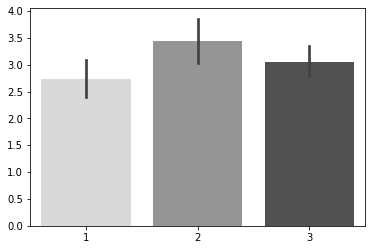

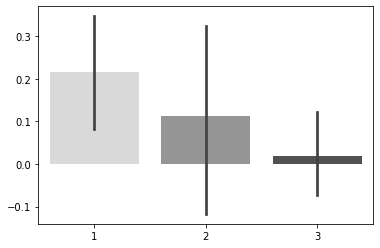

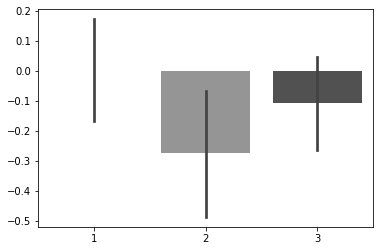

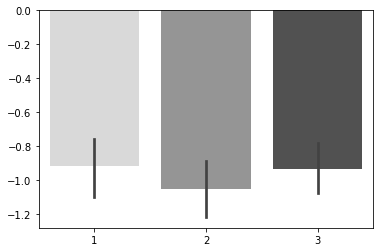

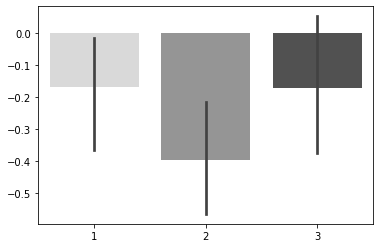

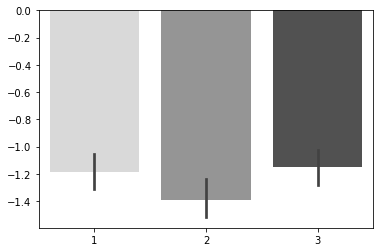

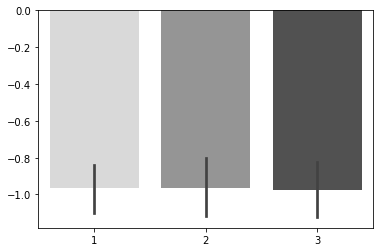

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_ind
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from datasets import subject_ET_FUS

subjects = subject_ET_FUS.load_subjects(r"E:\006_ET_MRgFUS\02_data_management\data_management_add_NC.csv")

subnetwork_path = r'E:\006_ET_MRgFUS\09_gradient_batch2\02_nii_mask\7network_atlas1039.csv'
subnetwork_df = pd.read_csv(subnetwork_path)
subnetwork_labels = subnetwork_df['Subnetwork'].values

def read_subject_gradients(df_path, subnetwork_labels,
                            subnetwork_i, ):
    df1 = pd.read_csv(df_path, index_col=0)
    x = df1['gradient'].values
    x = x[subnetwork_labels==subnetwork_i]
    return x

for i in range(1,8): 
    mean_values1 = []
    mean_values2 = []
    mean_values3 = []
    for subject in subjects:
        path1 = subject.get_observation('ncnc').gradient.build_path('batch2.1/aligned_gradient2.csv')
        values1 = read_subject_gradients(path1, subnetwork_labels, i,)
        mean_value1 = np.mean(values1)
        mean_values1.append(mean_value1)

        path2 = subject.get_observation('base').gradient.build_path('batch2.1/aligned_gradient2.csv')
        values2 = read_subject_gradients(path2, subnetwork_labels, i,)
        mean_value2 = np.mean(values2)
        mean_values2.append(mean_value2)

        path3 = subject.get_observation('180d').gradient.build_path('batch2.1/aligned_gradient2.csv')
        values3 = read_subject_gradients(path3, subnetwork_labels, i,)
        mean_value3 = np.mean(values3)
        mean_values3.append(mean_value3)

    mean_values = mean_values1 + mean_values2 + mean_values3
    x = [1 for _ in range(len(mean_values1))] + [2 for _ in range(len(mean_values2))] + [3 for _ in range(len(mean_values3))]
    
    sns.barplot(x=x, y=mean_values, palette="Greys") #"tab10"
    plt.show()
    plt.close()


In [ ]:
for i in range(20):

    print("i="+str(i))
    
    lam_HCHCHC = np.array(gm_HCHCHC.lambdas_)
    lam_ET180d = np.array(gm_ET180d.lambdas_)
    lam_ET000d = np.array(gm_ET000d.lambdas_)
    

    var_ET180d = lam_ET180d[:, i]/np.sum(lam_ET180d, axis=1)
    var_ET000d = lam_ET000d[:, i]/np.sum(lam_ET000d, axis=1)
    var_HCHCHC = lam_HCHCHC[:, i]/np.sum(lam_HCHCHC, axis=1)

    
   
    ts, ps = ttest_rel(var_ET180d, var_ET000d) 
    print(f'ET180d_vs_ET000d var_ET180d:{np.mean(var_ET180d):.2f}, var_ET000d:{np.mean(var_ET000d):.2f}, var_p:{ps}')


    ts, ps = ttest_ind(var_ET000d, var_HCHCHC)
    print(f'ET000d_vs_HCHCHC var_ET000d:{np.mean(var_ET000d):.2f}, var_HCHCHC:{np.mean(var_HCHCHC):.2f}, var_p:{ps}')


    ts, ps = ttest_ind(var_ET180d, var_HCHCHC)
    print(f'ET180d_vs_HCHCHC var_ET180d:{np.mean(var_ET180d):.2f}, var_HCHCHC:{np.mean(var_HCHCHC):.2f}, var_p:{ps}')